<a href="https://colab.research.google.com/github/sungjindo/black_coal_price/blob/main/Prophet_blackcoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.모듈 불러오기





In [2]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from plotly.offline import init_notebook_mode, iplot #plotly offline mode 
init_notebook_mode(connected = True)
import plotly.graph_objs as go #plotly graphical object
%matplotlib notebook
%matplotlib inline

# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score, train_test_split   # validation  검증 라이브러리

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



import warnings    # 경고문구 지우기
warnings.filterwarnings("ignore")



In [10]:
!pip3 install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from fbprophet import Prophet

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 2. data


In [28]:
df = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/dataset/df_final.csv", encoding = 'utf-8-sig')
df

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,호주지수,캐나다지수,베트남GDP,인도GDP,한국GDP,일본GDP,중국GDP,미국GDP,EUGDP,세계GDP
0,2019-12-29,67.50,93.41,68.60,6129.5,63.05,63.10,33.07,0.7,256.974,...,6821.700195,17168.199219,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
1,2019-12-22,66.55,91.55,68.16,6214.0,61.72,61.74,33.13,0.7,256.974,...,6816.299805,17118.400391,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
2,2019-12-15,66.35,91.74,66.14,6175.0,60.44,60.44,37.12,0.7,256.974,...,6739.700195,17003.099609,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
3,2019-12-08,66.30,92.27,65.22,6130.0,60.07,59.78,35.17,0.7,256.974,...,6707.000000,16997.000000,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
4,2019-12-01,66.40,88.56,64.39,5990.0,59.20,59.11,39.05,0.7,256.974,...,6846.000000,17040.199219,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2011-01-30,127.00,183.50,99.83,10067.0,89.03,89.13,54.84,6.8,220.223,...,4774.899902,13437.599609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
466,2011-01-23,130.35,179.50,99.42,9548.5,89.34,89.49,53.73,6.8,220.223,...,4755.700195,13258.599609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
467,2011-01-16,131.90,178.00,97.60,9462.5,89.11,89.13,55.12,6.8,220.223,...,4801.500000,13464.099609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
468,2011-01-09,136.00,179.50,98.68,9662.0,91.54,91.66,55.31,6.8,220.223,...,4705.000000,13272.299805,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13


In [29]:
df = df.sort_values('date')
df

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,호주지수,캐나다지수,베트남GDP,인도GDP,한국GDP,일본GDP,중국GDP,미국GDP,EUGDP,세계GDP
469,2011-01-02,136.35,173.50,93.33,9436.0,88.03,88.48,56.16,6.8,220.223,...,4745.200195,13443.200195,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
468,2011-01-09,136.00,179.50,98.68,9662.0,91.54,91.66,55.31,6.8,220.223,...,4705.000000,13272.299805,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
467,2011-01-16,131.90,178.00,97.60,9462.5,89.11,89.13,55.12,6.8,220.223,...,4801.500000,13464.099609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
466,2011-01-23,130.35,179.50,99.42,9548.5,89.34,89.49,53.73,6.8,220.223,...,4755.700195,13258.599609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
465,2011-01-30,127.00,183.50,99.83,10067.0,89.03,89.13,54.84,6.8,220.223,...,4774.899902,13437.599609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2019-12-01,66.40,88.56,64.39,5990.0,59.20,59.11,39.05,0.7,256.974,...,6846.000000,17040.199219,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
3,2019-12-08,66.30,92.27,65.22,6130.0,60.07,59.78,35.17,0.7,256.974,...,6707.000000,16997.000000,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
2,2019-12-15,66.35,91.74,66.14,6175.0,60.44,60.44,37.12,0.7,256.974,...,6739.700195,17003.099609,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
1,2019-12-22,66.55,91.55,68.16,6214.0,61.72,61.74,33.13,0.7,256.974,...,6816.299805,17118.400391,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13


In [30]:
df = df.iloc[:,[0,1]]
df

,date,Coal_price
469,2011-01-02,136.35
468,2011-01-09,136.00
467,2011-01-16,131.90
466,2011-01-23,130.35
465,2011-01-30,127.00
...,...,...
4,2019-12-01,66.40
3,2019-12-08,66.30
2,2019-12-15,66.35
1,2019-12-22,66.55


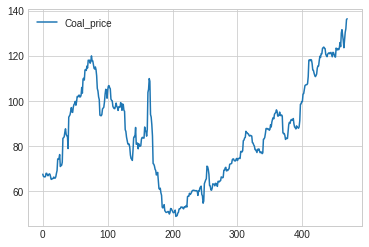

In [31]:
from matplotlib import pyplot
df.plot()
pyplot.show()

# 3. Prophet model

In [32]:
# 컬럼명 변경
df.columns = ['ds', 'y']

# 데이터 타입 변경
df['ds']= pd.to_datetime(df['ds'])

# 모델 생성
from fbprophet import Prophet
model = Prophet()

# 모델 학습
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 4. In-sample Forecast

*   트레인셋과 테스트 셋으로 확인하는 과정




In [69]:
# train set 마지막 1년 날짜 생성
last_1year = list()
for i in range(1, 13):
    last_1year.append(['2019-%12d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

In [70]:
# 에측
forecast = model.predict(last_1year)

In [71]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,91.629723,85.611589,103.107802,91.629723,91.629723,2.725795,2.725795,2.725795,2.725795,2.725795,2.725795,0.0,0.0,0.0,94.355519
1,2019-02-01,89.669481,83.948796,100.541184,89.669481,89.669481,2.311551,2.311551,2.311551,2.311551,2.311551,2.311551,0.0,0.0,0.0,91.981031
2,2019-03-01,87.898939,80.556170,98.148302,87.898939,87.898939,0.999634,0.999634,0.999634,0.999634,0.999634,0.999634,0.0,0.0,0.0,88.898573
3,2019-04-01,85.938696,73.981868,92.127842,85.938696,85.938696,-3.126247,-3.126247,-3.126247,-3.126247,-3.126247,-3.126247,0.0,0.0,0.0,82.812449
4,2019-05-01,84.041687,72.661665,90.018855,84.041687,84.041687,-2.830309,-2.830309,-2.830309,-2.830309,-2.830309,-2.830309,0.0,0.0,0.0,81.211378
5,2019-06-01,82.081444,70.043382,87.378896,82.081444,82.081444,-3.377910,-3.377910,-3.377910,-3.377910,-3.377910,-3.377910,0.0,0.0,0.0,78.703534
6,2019-07-01,80.184435,69.607058,86.019964,80.184435,80.184435,-2.614065,-2.614065,-2.614065,-2.614065,-2.614065,-2.614065,0.0,0.0,0.0,77.570370
7,2019-08-01,78.224192,69.162615,86.099981,78.224192,78.224192,-0.376496,-0.376496,-0.376496,-0.376496,-0.376496,-0.376496,0.0,0.0,0.0,77.847696
8,2019-09-01,76.263950,68.066678,85.305242,76.263950,76.263950,0.611057,0.611057,0.611057,0.611057,0.611057,0.611057,0.0,0.0,0.0,76.875007
9,2019-10-01,74.366941,66.578990,84.023445,74.366941,74.366941,0.864750,0.864750,0.864750,0.864750,0.864750,0.864750,0.0,0.0,0.0,75.231691


In [72]:
forecast.columns # yhat, yhat_lower, yhat_upper 중요하게 봐야함 - 예측값과 예측값 상하한

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [73]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds       yhat  yhat_lower  yhat_upper
0 2019-01-01  94.355519   85.611589  103.107802
1 2019-02-01  91.981031   83.948796  100.541184
2 2019-03-01  88.898573   80.556170   98.148302
3 2019-04-01  82.812449   73.981868   92.127842
4 2019-05-01  81.211378   72.661665   90.018855


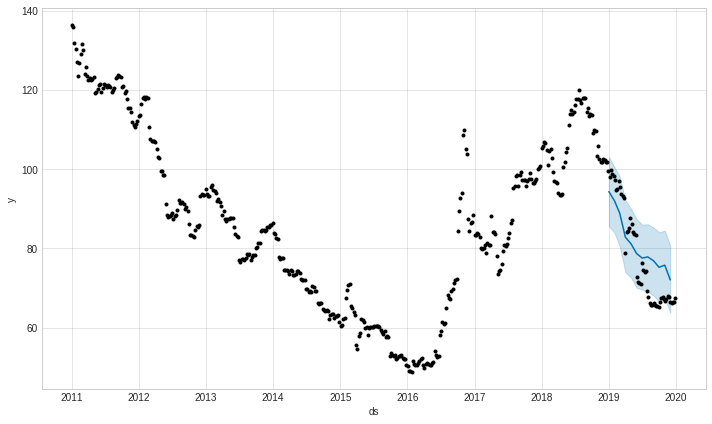

In [74]:
model.plot(forecast)
pyplot.show()

# 5. Out-Of-Sample Forecast

*   데이터 외부의 미래 예측



In [75]:
# train set 이후 1년 날짜 생성
last_1year = list()
for i in range(1, 13):
    last_1year.append(['2020-%12d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

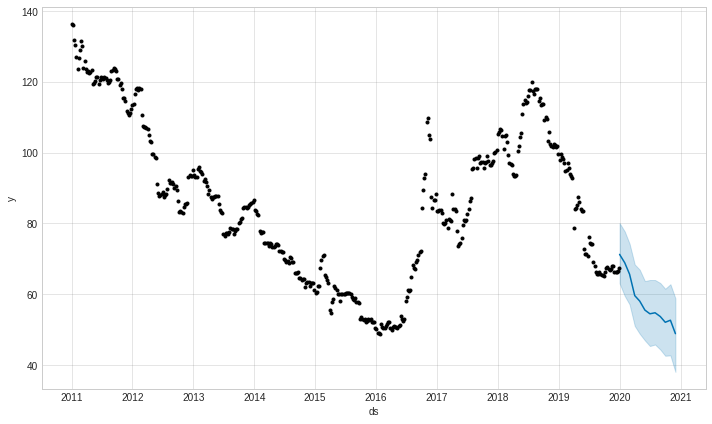

In [76]:
forecast = model.predict(last_1year)
model.plot(forecast)
pyplot.show()

# 6. Model 평가



*   testset의 마지막 12개월을 테스트 셋으로 빼서 학습




In [77]:
 # 마지막 12개월 제외시키기
train = df.drop(df.index[-12:])
y_true = df['y'][-12:].values

# 모델 생성 후 학습
model = Prophet()
model.fit(train)

# train set 마지막 1년 날짜 생성
last_1year = list()
for i in range(1, 13):
    last_1year.append(['2019-%12d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

# 예측하고 비교하기
# 여기에서는 MAE를 살펴본다.
forecast = model.predict(last_1year)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# MAE가 작을수록 좋은 모델이다.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 18.760


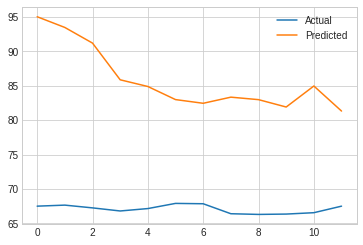

In [78]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()